# 빅데이터개론2  과제 3

**제출기한 : 2023년 4월 25일 23시 59분**

각 문제를 읽고 주어진 코드셀에 제시된 변수에 결과를 입력하거나, 주어진 텍스트셀에 프로그램 코드 또는 답안을 입력하여 제출하세요.  


아래는 필요한 라이브러리를 불러오는 코드셀입니다. 반드시 숙제를 시작할 때 먼저 실행시키고 문제에서 적절하게 이용하세요.


In [ ]:
# 한글 폰트가 깨질 때 사용 - 런타임 메뉴에서 "런타임 다시 시작" 또는 다시 "시작 및 모두 실행"을 선택  (출처: https://teddylee777.github.io/colab/colab-korean)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

plt.rc('font', family='NanumBarunGothic') # clolab 에서 한글 사용 
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (10,5)

In [ ]:
import math
import numpy as np
import pandas as pd
from itertools import product

**다음은 과제의 수행과 제출에 대한 안내입니다.**

- 빅데이터개론2 과제는 모두 Colab의 공유 기능을 이용하여 제출하게 됩니다. 자세한 제출방법은 강의시간(또는 동영상)에 알려줄 것입니다.

- 제출시 노트북의 이름(화일명)에서 성명과 학번을 자신의 이름과 학번으로 바꾼 후에 제출해야 합니다. (예: `빅데이터개론2_2023S_과제-03-홍길동-12345677.ipynb`) 

- 답을 입력하는 셀에 있는 `...`는 지우고 답을 입력하세요.

- **과제 노트북은 답을 제시하는 코드셀이나 텍스트셀 이외의 내용 또는 순서를 변경하지 마세요.**



## 1. 자료의 분포

고속 열차에 탑승한 승객에 대한 자료는 csv(comma-separated values) 형식으로 train-data-01.csv 화일에 저장되어 있다. csv 자료 화일의 각 열에 대한 이름과 설명은 다음과 같다. 자료는 2019년 7월 한 달 동안 출발역, 도착역별로 날마다 각 열차를 이용한 탑승객의 수가 나타나 있다.


- TRAIN_NO: 열차 번호

- DATE : 운행 일자

- STATION_START: 출발역

- STATION_ARRV : 도착역

- NUM_PASSENGER : 탑승객 수

pandas 라이브러리의 read_csv() 함수를 사용하면 csv 화일의 자료를 읽어서 데이터프레임 `train_raw_data` 를 아래와 같이 만들 수 있다.

**열이름이 모두 대문자임을 유의하세요.**




In [ ]:
url ="https://ilovedata.github.io/teaching/bigdata2/data/train-data-01.csv"
train_raw_data = pd.read_csv(url)

In [ ]:
train_raw_data.tail(10)

,TRAIN_NO,DATE,STATION_DEPART,STATION_ARRV,NUM_PASSENGER
1759,6,20190721,울산,부산,19.0
1760,6,20190722,울산,부산,10.0
1761,6,20190723,울산,부산,7.0
1762,6,20190724,울산,부산,12.0
1763,6,20190725,울산,부산,11.0
1764,6,20190726,울산,부산,10.0
1765,6,20190727,울산,부산,6.0
1766,6,20190728,울산,부산,21.0
1767,6,20190729,울산,부산,12.0
1768,6,20190730,울산,부산,11.0


**문제 1**

데이터프레임 `train_raw_data` 을 이용하여 탑승 인원 수 `NUM_PASSENGER` 에 대한 히스토그램을 작성하는 코드를 다음 코드셀에 작성하시오. 

단, 구간의 개수(`bins`)는 15개로 지정하시오

<Axes: ylabel='Frequency'>

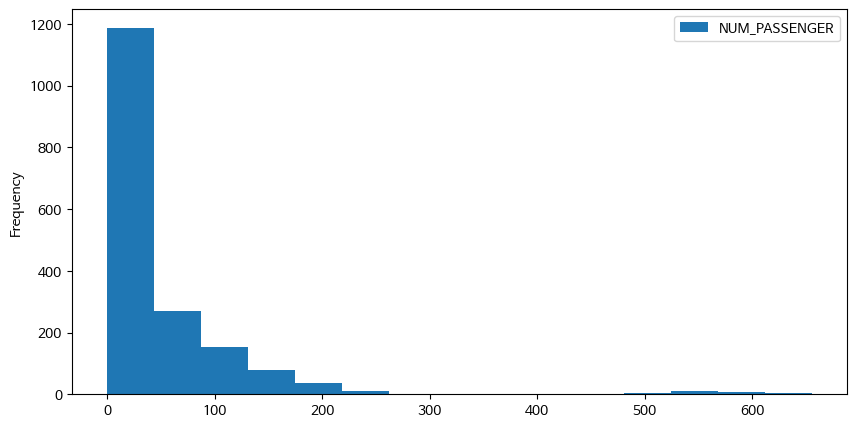

In [ ]:
train_raw_data.plot.hist(y='NUM_PASSENGER', bins=15)

**문제 2**

데이터프레임 `train_raw_data` 을 이용하여 탑승 인원 수 `NUM_PASSENGER` 에 대한 상자그림을 작성하는 코드를 다음 코드셀에 작성하시오

<Axes: >

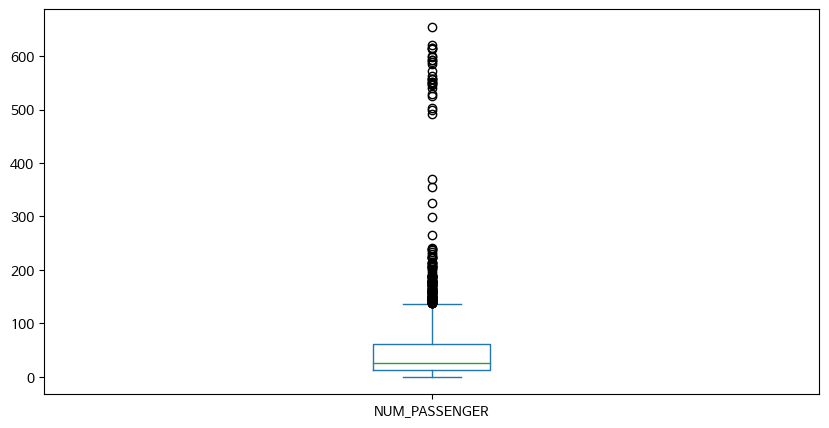

In [ ]:
train_raw_data.plot.box(y='NUM_PASSENGER')

**문제 3**

 위의 문제 1 과 2 에서 작성한 히스토그램과 상자그림을 참고하여  다음 4개의 항목 중에서 탑승 인원 수 `NUM_PASSENGER`의 분포에 대한 설명이 적절한 항목을 선택하여 다음 코드셀 `ans3` 에 입력하시오.

7월 한 달 동안 열차가 수송한 각 일별, 열차별, 구간별 모든 자료에서 탑승객 수의 분포는

1. 종처럼 대칭인 분포이다..
2. 왼 쪽으로 꼬리가 긴 분포이다. 
3. 오른 쪽으로 꼬리가 긴 분포이다.
4. 위의 1,2,3 에 해당하지 않는다.

In [ ]:
ans3 = 3

**문제 4**

데이터프레임 `train_raw_data` 에서 **출발역이 서울이고, 도착역이 부산인 자료만 선택** 하여 탑승 인원 수 `NUM_PASSENGER` 에 대한 히스토그램과 상자그림을 모두 그려보고 분포에 대한 설명이 가장 적절한 항목을 선택하여 다음 코드셀 `ans4` 에 입력하시오.

7월 한 달 동안 열차가 수송한 각 일별, 열차별, 서울-부산 탑승객 수의 분포는

1. 종처럼 대칭인 분포이다..
2. 왼 쪽으로 꼬리가 긴 분포이다. 
3. 오른 쪽으로 꼬리가 긴 분포이다.
4. 위의 1,2,3 에 해당하지 않는다.

In [ ]:
df = train_raw_data.loc[(train_raw_data.STATION_DEPART  == '서울') & (train_raw_data.STATION_ARRV == '부산')]

<Axes: ylabel='Frequency'>

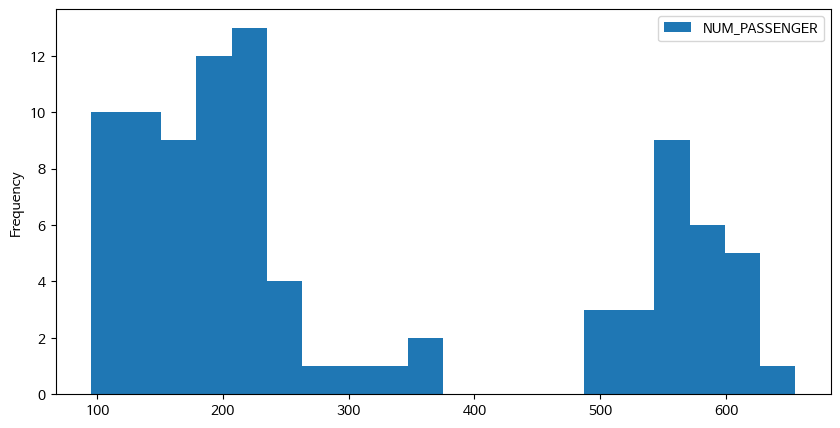

In [ ]:
df.plot.hist(y='NUM_PASSENGER', bins=20)

<Axes: >

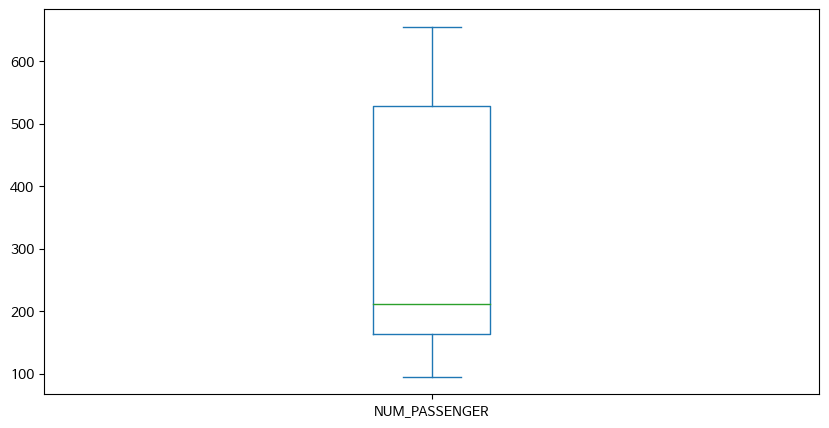

In [ ]:
df.plot.box(y='NUM_PASSENGER')

In [ ]:
ans4 = 4

**문제 5**

데이터프레임 `train_raw_data` 에서 **출발역이 서울이고, 도착역이 대전인 자료만 선택** 하여 탑승 인원 수 `NUM_PASSENGER` 에 대한 히스토그램과 상자그림을 모두 그려보고 분포에 대한 설명이 가장 적절한 항목을 선택하여 다음 코드셀 `ans5` 에 입력하시오.

7월 한 달 동안 열차가 수송한 각 일별, 열차별, 서울-부산 탑승객 수의 분포는

1. 종처럼 대칭인 분포이다..
2. 오른 쪽으로 꼬리가 긴 분포이다.
3. 왼 쪽으로 꼬리가 긴 분포이다. 
4. 위의 1,2,3 에 해당하지 않는다.

In [ ]:
df2 = train_raw_data.loc[(train_raw_data.STATION_DEPART  == '서울') & (train_raw_data.STATION_ARRV == '대전')]

<Axes: ylabel='Frequency'>

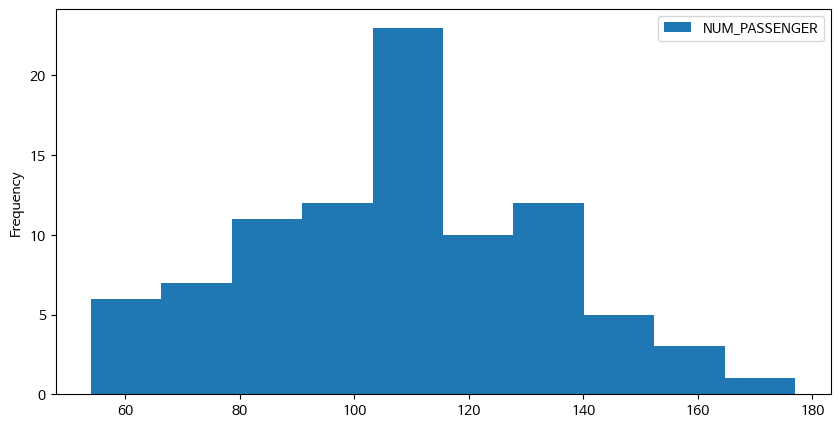

In [ ]:
df2.plot.hist(y='NUM_PASSENGER', bins=10)

<Axes: >

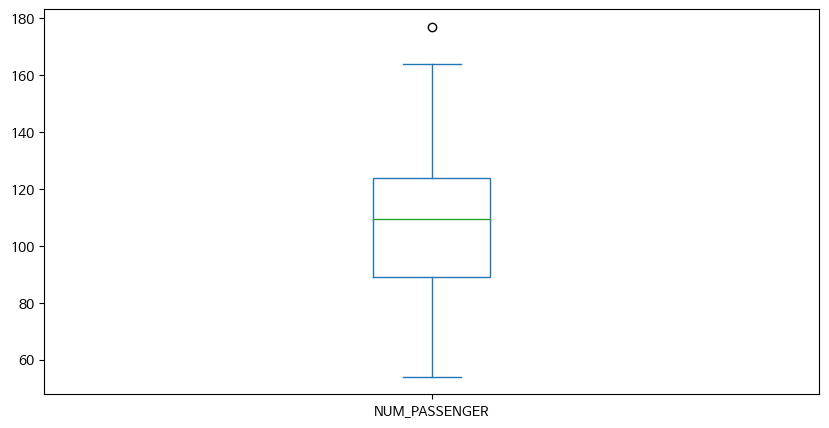

In [ ]:
df2.plot.box(y='NUM_PASSENGER')

In [ ]:
ans5 = 1

**문제 6**

다음 코드는 7월 한 달 동안 **서울에서 출발한 열차**만 선택한 데이터프레임 `train_seoul` 을 만드는 코드이다.  


In [ ]:
train_seoul = train_raw_data.loc[ train_raw_data.STATION_DEPART == "서울"]

위에서 만든 데이터프레임 train_seoul 을 이용하여 7월 한 달 동안 서울에서 출발한 열차를 모두 고려하면 운행 회수가 가장 적은 도착역은 천안아산역이다. 출발역이 서울이고 도착역이 천안아산인 열차의 총 운행 회수를 `ans6` 에 입력하세요.  

In [ ]:
ans6 = 30

In [ ]:
train_seoul[ ["STATION_ARRV"]].value_counts()

STATION_ARRV
대전              90
동대구             90
부산              90
광명              60
오송              60
울산              60
천안아산            30
dtype: int64

**문제 7** 

위에서 만든 데이터프레임 `train_seoul` 을 이용하여 7월 한 달 동안 서울에서 출발한 열차가 **정차한 총 횟수 를 도착열별로** 나타내는 파이 차트(pie chart)를 그리는 코드를 아래 코드 셀에 작성하시오.  

<Axes: >

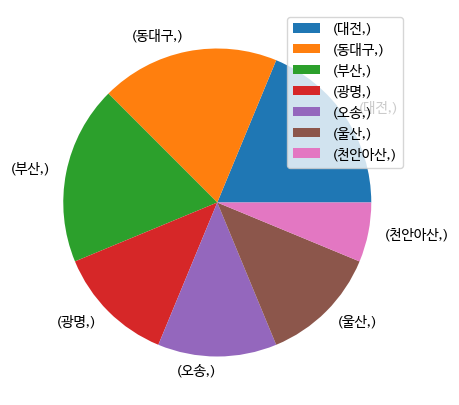

In [ ]:
train_seoul[ ["STATION_ARRV"]].value_counts().plot.pie(legend=True)

**문제 8**

7월 한 달 동안 운행한 모든 열차들을 **출발역과 도착역별로 그룹화** 하여 **총 탑승객의 수**를 고려할 때 총 탑승객 수가 가장 적은 구간을 다음 항목에서 선택하여 `ans8` 에 입력하시오  

1. 천안아산	-> 오송
2. 행신	-> 서울
3. 천안아산 ->	대전
4. 천안아산	-> 동대구	

In [ ]:
df3 = train_raw_data[['STATION_DEPART',	'STATION_ARRV', 'NUM_PASSENGER']].groupby(by =['STATION_DEPART',	'STATION_ARRV']).sum().reset_index()
df3.sort_values(by=['NUM_PASSENGER'])

,STATION_DEPART,STATION_ARRV,NUM_PASSENGER
26,천안아산,오송,127.0
31,행신,서울,260.0
23,천안아산,대전,262.0
18,오송,대전,262.0
24,천안아산,동대구,317.0
5,광명,천안아산,329.0
25,천안아산,부산,368.0
27,천안아산,울산,397.0
11,서울,광명,586.0
3,광명,오송,699.0


In [ ]:
ans8 = 1

**문제 9**

7월 한 달 동안 **출발역이 서울이고 도착역이 대전인 자료만 선택하여** 데이터프레임 `df4`를 만드는 코드이다. 

데이터프레임 `df4`를 이용하여 다음 문제들의 답을 지정된 코드 셀에 입력하시오.



In [ ]:
df4 = train_raw_data.loc[(train_raw_data.STATION_DEPART  == '서울') & (train_raw_data.STATION_ARRV == '대전')]

In [ ]:
df4

,TRAIN_NO,DATE,STATION_DEPART,STATION_ARRV,NUM_PASSENGER
0,2,20190701,서울,대전,106.0
1,2,20190702,서울,대전,113.0
2,2,20190703,서울,대전,146.0
3,2,20190704,서울,대전,84.0
4,2,20190705,서울,대전,105.0
...,...,...,...,...,...
955,6,20190726,서울,대전,98.0
956,6,20190727,서울,대전,92.0
957,6,20190728,서울,대전,131.0
958,6,20190729,서울,대전,77.0


In [ ]:
df4.describe()

,TRAIN_NO,DATE,NUM_PASSENGER
count,90.000000,9.000000e+01,90.000000
mean,4.333333,2.019072e+07,107.711111
std,1.709195,8.703932e+00,25.844063
min,2.000000,2.019070e+07,54.000000
25%,2.000000,2.019071e+07,89.000000
50%,5.000000,2.019072e+07,109.500000
75%,6.000000,2.019072e+07,124.000000
max,6.000000,2.019073e+07,177.000000


In [ ]:
IQR = 124-89
IQR

35

(1) 탑승객의 수의 평균(mean)을 다음 코드 셀의 `ans91` 에 입력하시오 (소숫점 첫째 자리에서 반올림하여 정수로 답하세요)

In [ ]:
ans91 = 108

(2) 탑승객의 수의 중앙값(median)을 다음 코드 셀의 `ans92` 에 입력하시오 (소숫점 첫째 자리에서 반올림하여 정수로 답하세요).

In [ ]:
ans92 = 110

(3) 탑승객의 수의 IQR 을 다음 코드 셀의 `ans93` 에 입력하시오 (소숫점 첫째 자리에서 반올림하여 정수로 답하세요).

In [ ]:
ans93 = 35

(4) 탑승객 수에 대한 상자그림을 그리는 코드를 입력하세요.

<Axes: >

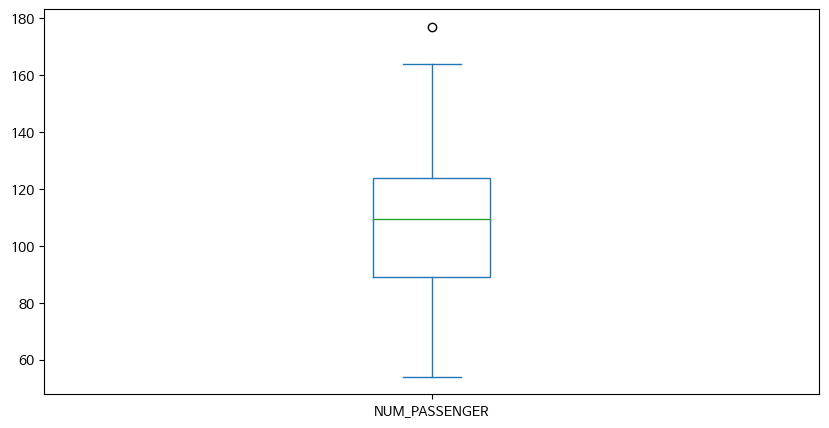

In [ ]:
df4.plot.box(y='NUM_PASSENGER')

## 2. 조건문과 반복문

**문제 1**

**1 부터 1000 까지의 정수** 에서 **짝수** 들의 합계(sum)를 구하여 `mysum1` 에 저장하는 코드를 다음 코드 셀에서 작성하시오.

In [ ]:
mysum1 = 0
for i in np.arange(1,1001):
    remainder = i - (i//2)*2
    if remainder ==0 :
        mysum1 = mysum1 + i 

mysum1

250500

참고로 표현식 `a // b` 는 `a`를 `b` 로 나누는 경우 몫을 출력하고 `a % b` 는 `a` 를  `b` 로 나누는 경우 나머지를 출력한다.

**문제 2**

다음과 같이 7 명 학생의 이름이 포함된 리스트 `student_names` 가 주어졌다고 하자. 

In [ ]:
student_names = ['이용희', '김철수', '한용희', '윤이영', '이길용', '김용희', '홍동이']

이름이 `용희`인 학생의 수를 계산하여 `mysum2` 에  저장하는 구하는 코드를 아래 코드 셀에 작성하시오.

In [ ]:
mysum2 = 0

for firstname in student_names:
  if "용희" in firstname:
    mysum2 = mysum2 + 1

mysum2

3

**문제 3**

위의 문제 2에서 주어진 리스트 `student_names` 에서 성이 **`이`** 씨인 사람이 몇 명인지 계산하여 `mysum3` 에  저장하는 구하는 코드를 아래 코드 셀에 작성하시오.

In [ ]:
mysum3 = 0

last_names = []

for str in student_names:
  last_names.append(str[0])

for last_name in last_names:
  if "이" in last_name:
    mysum3 = mysum3 + 1

mysum3

2

**문제 4**

$a_1=1$ 이고 $ r= 5$ 인 경우, 다음의 등비 수열의 합을 `mysum4` 에 저장하는 코드를 다음 코드 셀에 입력하시오.

$$ a_{i+1} = r a_{i}$$

$$ \texttt{mysum4 } = \sum_{i=1}^{10} a_i $$

In [ ]:
mysum4 = 0

x = 1
r = 5

for i in np.arange(10):
    mysum4 = mysum4 + x
    x = r*x    

mysum4

2441406

## 3.독립시행과 표본공간

하나의 주사위를 던지는 경우 나올 수 있는 표본 공간은 다음과 같다.

$$ S = \{ 1, 2, 3, 4, 5 ,6 \} $$

표본 공간 S 를 다음과 같이 이름이 `dice` 인 리스트로 만들어 보자.

In [ ]:
dice = [1,2,3,4,5,6]

**문제 1**

주사위를 5 번 연속으로 던질 때 나올 수 있는 모든 경우를 포함하는 표본 공간을  이름이 `dice_5` 인 리스트에 저장하는 코드를 아래 코드셀에 작성하시오.

HINT: 라이브러리 `itertools` 에서 제공하는 함수 `product()` 를 이용하자.



In [ ]:
dice_5 = list(product(dice, repeat= 5))
dice_5[0:10]

[(1, 1, 1, 1, 1),
 (1, 1, 1, 1, 2),
 (1, 1, 1, 1, 3),
 (1, 1, 1, 1, 4),
 (1, 1, 1, 1, 5),
 (1, 1, 1, 1, 6),
 (1, 1, 1, 2, 1),
 (1, 1, 1, 2, 2),
 (1, 1, 1, 2, 3),
 (1, 1, 1, 2, 4)]

**문제 2**

예를 주사위를 5번 연속으로 던진 결과가 다음과 같이 리스트 `roll` 과 같이 나오면 1의 눈이 3번 나온 것이다.

In [ ]:
roll = [6,2,1,1,1]

tsum =0

for res in roll:
    if res == 1 :
      tsum = tsum + 1

tsum

3

주사위를 5번 연속으로 던졌을 때 1의 눈이 3번 나온 경우가 표본 공간 `dice_5` 인 리스트에 몇 번 나타나는지 횟수를 계산하여 `mysum5` 에 저장하는 코드를 작성하시오.

[HINT] 반복문을 중첩하여 사용할 수 있다. 

In [ ]:
mysum5 = 0

for oneroll in dice_5:
  tsum = 0
  for res in oneroll:
    if res == 1 :
      tsum = tsum + 1
  if tsum == 3:
    mysum5 =mysum5+ 1

mysum5    

250